<a href="https://colab.research.google.com/github/Arthur-Ogon/Arthur-Ogon/blob/main/Pet_interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install -q matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_database = pd.read_csv('pet_interaction.csv')

In [ ]:
df_database.head()


,body_abs_x_min,body_abs_y_min,body_abs_x_max,body_abs_y_max,body_rel_x_min,body_rel_y_min,body_rel_x_max,body_rel_y_max,pet_abs_x_min,pet_abs_y_min,pet_abs_x_max,pet_abs_y_max,pet_rel_x_min,pet_rel_y_min,pet_rel_x_max,pet_rel_y_max,pet_category,iou,is_facing,interaction
0,929.0,855.0,1184.0,1358.1,0.358410,0.329861,0.456790,0.523958,929.0,855.0,1184.0,1358.1,0.358410,0.329861,0.456790,0.523958,Cat,0.158126,0,1
1,447.0,335.0,734.0,594.0,0.349219,0.261719,0.573438,0.464062,447.0,335.0,734.0,594.0,0.349219,0.261719,0.573438,0.464062,Dog,0.281544,0,0
2,0.0,0.0,663.3,1942.0,0.000000,0.000000,0.255903,0.749228,0.0,0.0,663.3,1942.0,0.000000,0.000000,0.255903,0.749228,Dog,-0.060581,-1,0
3,69.0,115.0,500.0,532.0,0.053906,0.089844,0.390625,0.415625,69.0,115.0,500.0,532.0,0.053906,0.089844,0.390625,0.415625,Dog,-0.056403,0,0
4,69.0,117.0,501.0,530.0,0.053906,0.091406,0.391406,0.414062,69.0,117.0,501.0,530.0,0.053906,0.091406,0.391406,0.414062,Dog,-0.062953,0,0


In [ ]:
df_database.columns


Index(['body_abs_x_min', 'body_abs_y_min', 'body_abs_x_max', 'body_abs_y_max',
       'body_rel_x_min', 'body_rel_y_min', 'body_rel_x_max', 'body_rel_y_max',
       'pet_abs_x_min', 'pet_abs_y_min', 'pet_abs_x_max', 'pet_abs_y_max',
       'pet_rel_x_min', 'pet_rel_y_min', 'pet_rel_x_max', 'pet_rel_y_max',
       'pet_category', 'iou', 'is_facing', 'interaction'],
      dtype='object')

In [ ]:
df_database.info

<bound method DataFrame.info of       body_abs_x_min  body_abs_y_min  body_abs_x_max  body_abs_y_max  \
0              929.0           855.0          1184.0          1358.1   
1              447.0           335.0           734.0           594.0   
2                0.0             0.0           663.3          1942.0   
3               69.0           115.0           500.0           532.0   
4               69.0           117.0           501.0           530.0   
...              ...             ...             ...             ...   
6812             5.0           288.0           441.0           717.0   
6813             5.0           300.0           449.0           717.0   
6814           322.0             0.0          1305.0          1041.0   
6815           570.0           168.0           822.0           565.0   
6816           231.0           277.0           553.0           554.0   

      body_rel_x_min  body_rel_y_min  body_rel_x_max  body_rel_y_max  \
0           0.358410        0.3

In [ ]:
# Estatísticas descritivas
print(df_database.describe())


       body_abs_x_min  body_abs_y_min  body_abs_x_max  body_abs_y_max  \
count     6817.000000     6817.000000     6817.000000     6817.000000   
mean       469.550641      212.314916      858.810962      733.306101   
std        342.326429      159.570502      407.382697      281.279065   
min         -0.490000        0.000000       50.550000      298.000000   
25%        181.000000      110.000000      570.000000      532.000000   
50%        489.200000      182.000000      772.000000      665.000000   
75%        648.000000      308.800000     1043.890000      720.000000   
max       2231.600000     1277.000000     2592.000000     1944.000000   

       body_rel_x_min  body_rel_y_min  body_rel_x_max  body_rel_y_max  \
count     6817.000000     6817.000000     6817.000000     6817.000000   
mean         0.305486        0.142740        0.558052        0.477780   
std          0.191976        0.092098        0.173846        0.085597   
min         -0.000189        0.000000        0.039

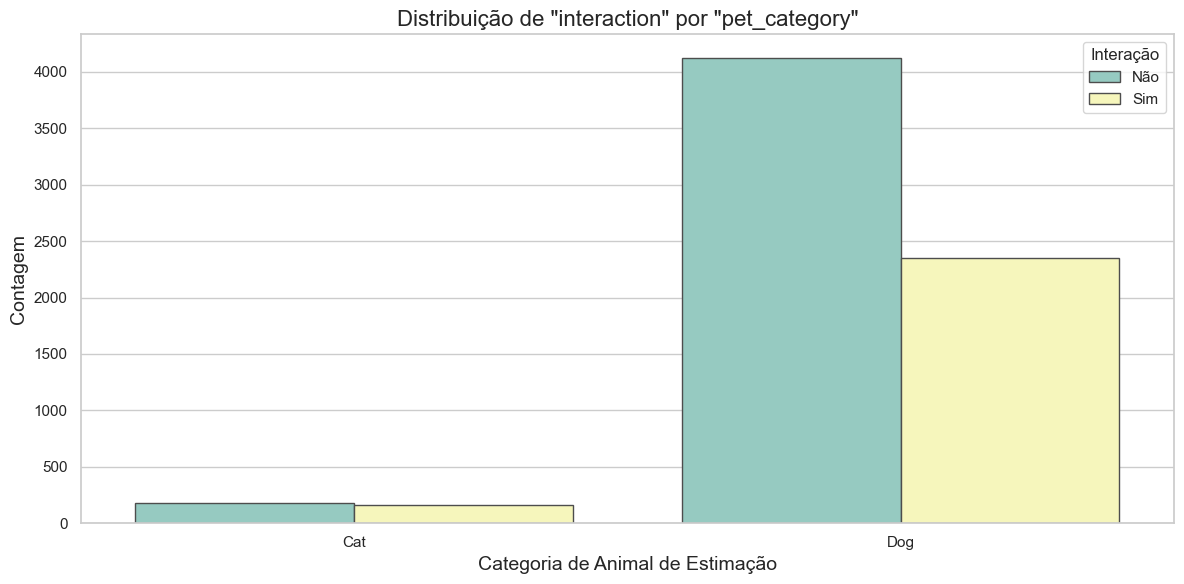

In [ ]:
# gráfico de contagem que representa a distribuição da variável "interaction" com base na categoria de animal de estimação ("pet_category").

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))
sns.countplot(x='pet_category', hue='interaction', data=df_database, palette="Set3", edgecolor=".3")
plt.title('Distribuição de "interaction" por "pet_category"', fontsize=16)
plt.xlabel('Categoria de Animal de Estimação', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Interação', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

Quantidade de pontos fora do intervalo de -1 a 1 para 'iou': 7


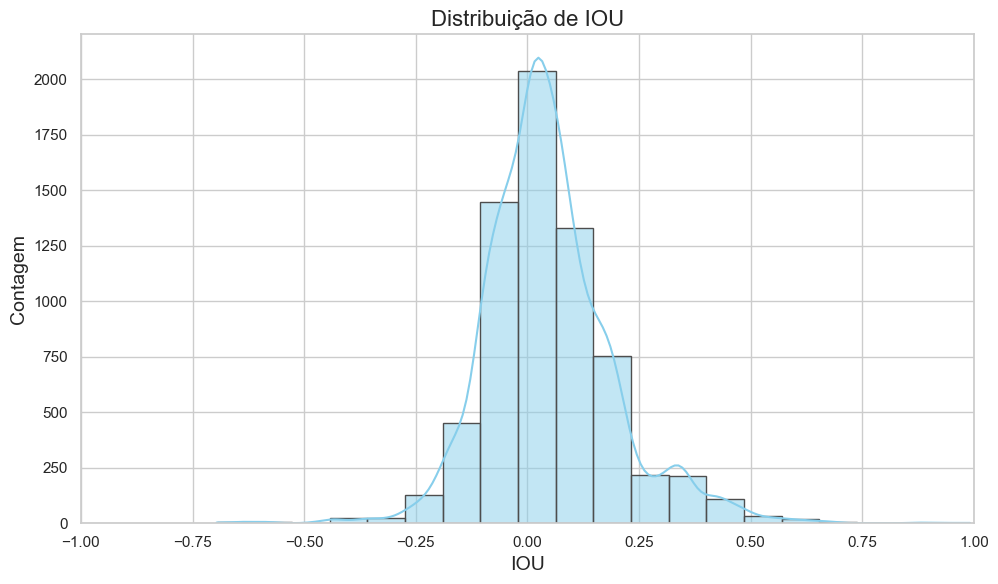

In [ ]:
# Aqui criei um histograma da variável "iou" usando sns.histplot. O eixo x representa os valores de IOU,
# e as barras do histograma mostram a frequência dos diferentes valores.

out_of_range_iou = df_database[(df_database['iou'] < -1) | (df_database['iou'] > 1)]
print(f"Quantidade de pontos fora do intervalo de -1 a 1 para 'iou': {len(out_of_range_iou)}")

# Remove as linhas fora do intervalo de -1 a 1 para 'iou'
df_database = df_database[(df_database['iou'] >= -1) & (df_database['iou'] <= 1)]


sns.set(style="whitegrid", palette="husl")
plt.figure(figsize=(10, 6))
sns.histplot(df_database['iou'], bins=20, kde=True, color="skyblue", edgecolor=".3")
plt.title('Distribuição de IOU', fontsize=16)
plt.xlabel('IOU', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.tight_layout()
plt.xlim(-1, 1)
plt.show()

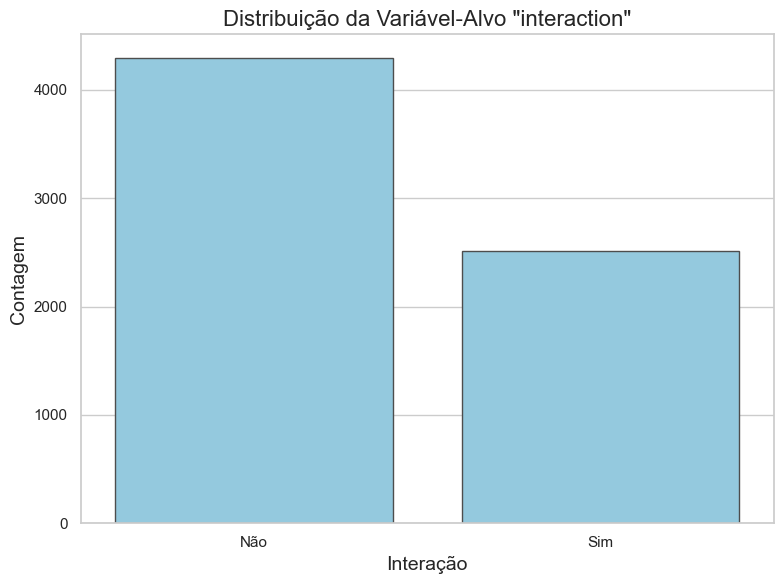

In [ ]:
# Gráfico de contagem que representa a distribuição da variável-alvo "interaction".
# As barras indicam a contagem de instâncias em que a interação foi "Não" (0) ou "Sim" (1).

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='interaction', data=df_database, color="skyblue", edgecolor=".3")
plt.title('Distribuição da Variável-Alvo "interaction"', fontsize=16)
plt.xlabel('Interação', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


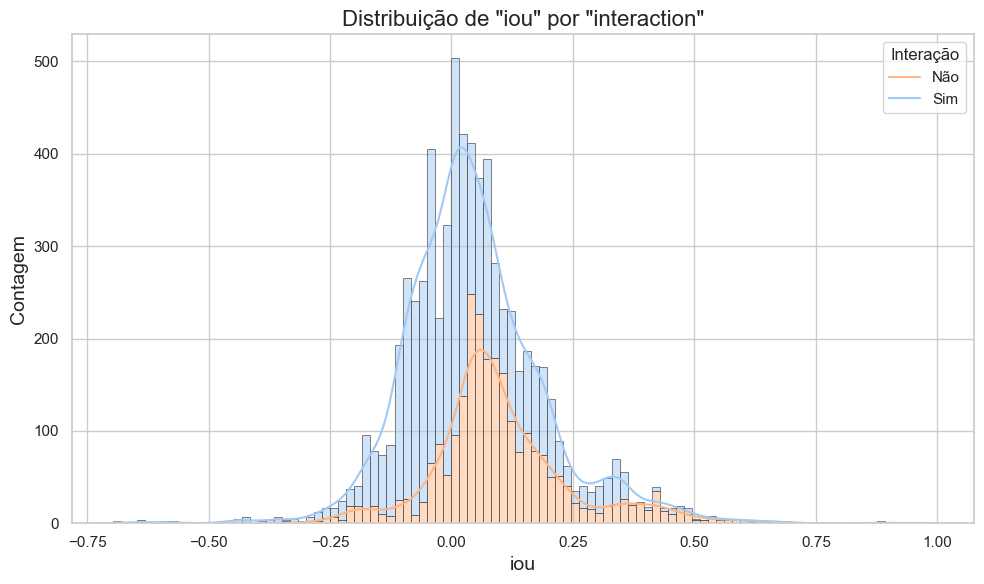

In [ ]:
#Criei um histograma para a variável "iou" dividido pela variável "interaction".

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
sns.histplot(x='iou', hue='interaction', data=df_database, kde=True, multiple="stack", edgecolor=".3")
plt.title('Distribuição de "iou" por "interaction"', fontsize=16)
plt.xlabel('iou', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Interação', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

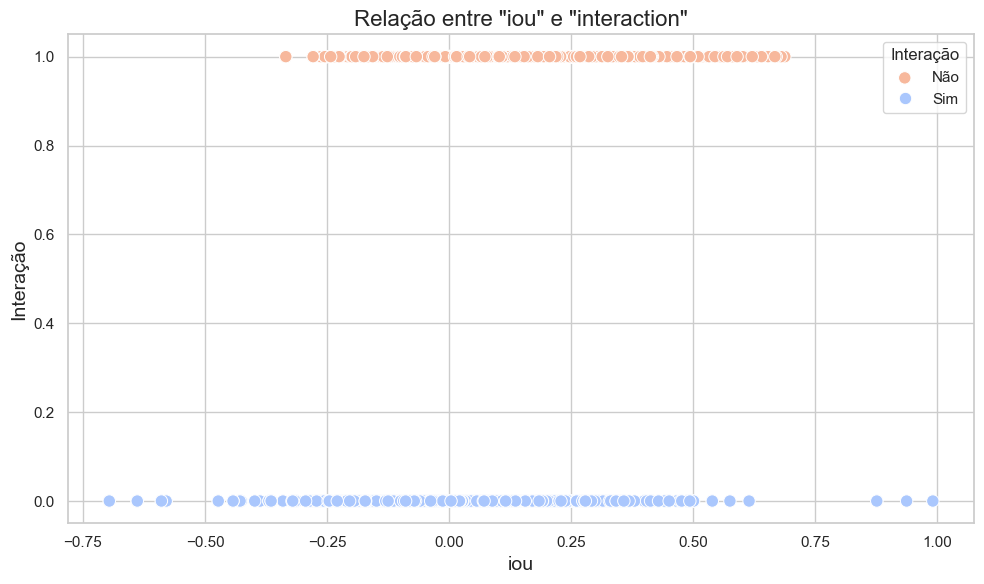

In [ ]:
# Criei  um scatter plot (gráfico de dispersão) para explorar a relação entre as variáveis "iou" e "interaction".
# Cada ponto no gráfico representa uma observação, onde a posição ao longo do eixo x é determinada por "iou" e ao longo do eixo y por "interaction".

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='iou', y='interaction', data=df_database, hue='interaction', palette='coolwarm', edgecolor="w", s=80)
plt.title('Relação entre "iou" e "interaction"', fontsize=16)
plt.xlabel('iou', fontsize=14)
plt.ylabel('Interação', fontsize=14)
plt.legend(title='Interação', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

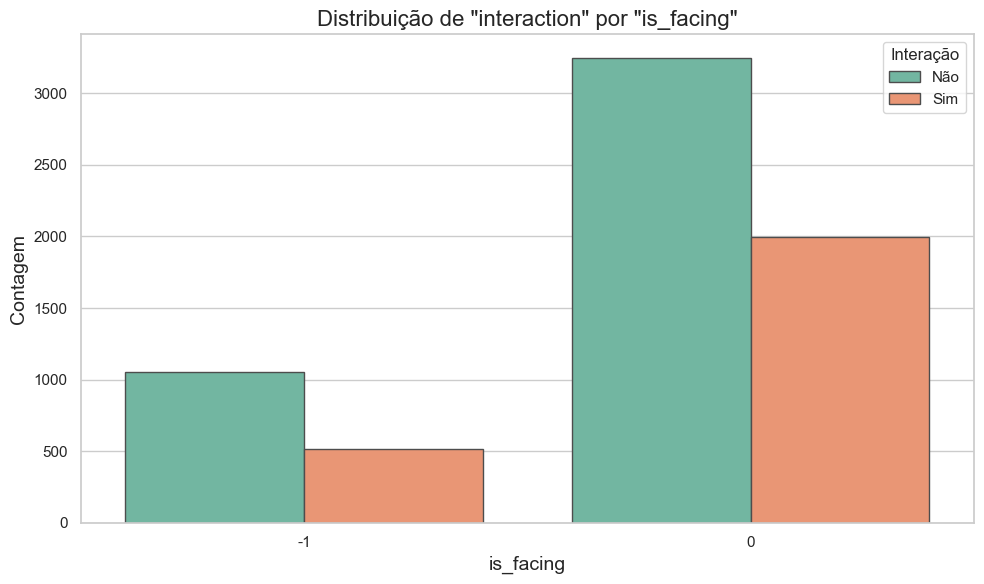

In [ ]:
# Gráfico de contagem que representa a distribuição da variável "interaction" em relação à variável "is_facing".

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
sns.countplot(x='is_facing', hue='interaction', data=df_database, palette="Set2", edgecolor=".3")
plt.title('Distribuição de "interaction" por "is_facing"', fontsize=16)
plt.xlabel('is_facing', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Interação', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()